In [1]:
import pickle

In [2]:
X=pickle.load(open('X.pkl','rb'))

y=pickle.load(open('y.pkl','rb'))


In [3]:
X=X[0:3000]
y=y[0:3000]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [6]:
X_train=X_train/255.0 # taking only 3000 image to process

In [7]:
X_test=X_test/255.0  # taking only 3000 image to process

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [12]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10


36/36 [==============================] - 21s 486ms/step - loss: 0.7360 - accuracy: 0.5280
Epoch 2/10
36/36 [==============================] - 15s 421ms/step - loss: 0.6537 - accuracy: 0.6164
Epoch 3/10
36/36 [==============================] - 15s 417ms/step - loss: 0.6000 - accuracy: 0.6929
Epoch 4/10
36/36 [==============================] - 15s 409ms/step - loss: 0.5239 - accuracy: 0.7498
Epoch 5/10
36/36 [==============================] - 14s 400ms/step - loss: 0.4497 - accuracy: 0.7818
Epoch 6/10
36/36 [==============================] - 15s 404ms/step - loss: 0.3578 - accuracy: 0.8364
Epoch 7/10
36/36 [==============================] - 14s 402ms/step - loss: 0.3189 - accuracy: 0.8698
Epoch 8/10
36/36 [==============================] - 15s 408ms/step - loss: 0.2415 - accuracy: 0.9076
Epoch 9/10
36/36 [==============================] - 14s 402ms/step - loss: 0.2071 - accuracy: 0.9244
Epoch 10/10
36/36 [==============================] - 15s 406ms/step - loss: 0.1532 - accu

In [13]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 4s 71ms/step - loss: 0.8636 - accuracy: 0.6853


[0.8635767698287964, 0.6853333115577698]

In [14]:
import random
import matplotlib.pyplot as plt

In [ ]:
"""ix=random.randint(0,len(y_test))
plt.imshow(X_test[ix,:])
plt.show()

y_pred=model.predict(X_test[ix,:].reshape(1,160,160,3))

pred=y_pred > 0.3

if(pred==False):
    image="cat"
else:
    image="dog"
print("the above image is :",image)"""


**GETTING OUTPUT**

1/1 [==============================] - 0s 20ms/step


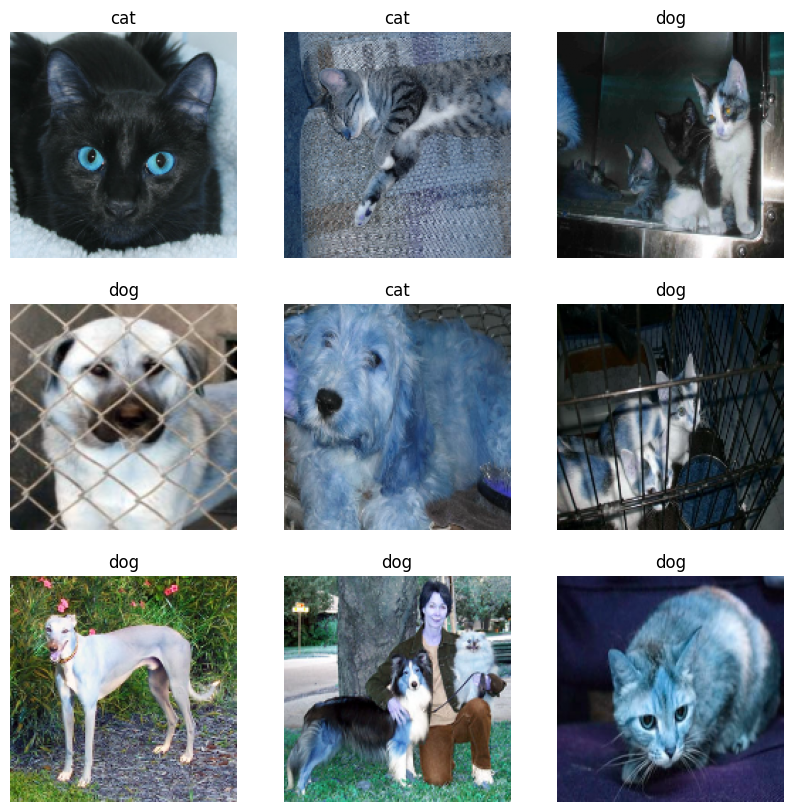

In [83]:
w=10
h=10
fig=plt.figure(figsize=(w, h))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    ix=random.randint(0,len(y_test))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[ix,:])
    y_pred=model.predict(X_test[ix,:].reshape(1,160,160,3))

    pred=y_pred > 0.3

    if(pred==False):
      image="cat"
    else:
      image="dog"
    plt.axis('off')
    plt.title(image)
plt.show()